In [4]:
import pandas as pd

df = pd.read_csv('duomenys.txt', sep='\t', encoding='iso-8859-13')

df

,Stebinys,Amžius,Ligos sunkumo indeksas,Chirurginis (1) / medicininis (0),Nerimo indeksas,Pasitenkinimas
0,1,55,50,0,2.1,68
1,2,46,24,1,2.8,77
2,3,30,46,1,3.3,96
3,4,35,48,1,4.5,80
4,5,59,58,0,2.0,43
5,6,61,60,0,5.1,44
6,7,74,65,1,5.5,26
7,8,38,42,1,3.2,88
8,9,27,42,0,3.1,75
9,10,51,50,1,2.4,57


- (a)	Sudarykite daugialypės tiesinės regresijos modelį nr.1 skirtą nustatyti, kurie nepriklausomi kintamieji turi įtakos paciento pasitenkinimui


In [5]:


import statsmodels.api as sm

# Priklausomas kintamasis
y = df.iloc[:, -1:]

# Nepriklausomas kintamsis
x = df.iloc[:, 1:5]

const = sm.add_constant(x)

model = sm.OLS(y, const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Pasitenkinimas   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     46.87
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           6.95e-10
Time:                        18:40:43   Log-Likelihood:                -82.062
No. Observations:                  25   AIC:                             174.1
Df Residuals:                      20   BIC:                             180.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- (b)	Ar visi modelio parametrai turi įtakos pasitenkinimui? Atsakymą pagrįskite.

Kadangi Stjudento reikšmės yra -2 < t < 2, tai atmetame Chirurginis (1) / medicininis (0) ir Nerimo indeksas



Pateiktoje tiesinės regresijos modelio santraukoje matome, kad:

Konstantos (intercept) koeficientas yra 143.6672, su p-reikšme < 0.001, tai reiškia, kad ji yra statistiškai reikšminga.
Amžius turi koeficientą -0.1172 ir p-reikšmę < 0.001, kas rodo, kad amžius yra statistiškai reikšmingas ir neigiamai susijęs su pasitenkinimu.
Ligos sunkumo indeksas turi koeficientą -0.5869 ir p-reikšmę < 0.001, tai taip pat rodo statistiškai reikšmingą ir neigiamą ryšį su pasitenkinimu.
Chirurginis (1) / medicininis (0) turi koeficientą 0.4149, bet p-reikšmė yra 0.892, kas yra daug didesnė už 0.05, todėl šis kintamasis nėra statistiškai reikšmingas.
Nerimo indeksas turi koeficientą 1.3064 su p-reikšme 0.242, tai yra teigiamas koeficientas, kas teoriškai reiškia, kad didesnis nerimo indeksas yra susijęs su didesniu pasitenkinimu, tačiau jo p-reikšmė taip pat yra didesnė už 0.05, tad šis ryšys nėra statistiškai patikimas.
Remiantis šiais duomenimis, galime padaryti išvadą, kad Amžius ir Ligos sunkumo indeksas turi statistiškai reikšmingą įtaką paciento pasitenkinimui ir abu šie ryšiai yra neigiami. Tai reiškia, kad didesnis amžius ir didesnis ligos sunkumo indeksas yra susiję su mažesniu pasitenkinimu. Tuo tarpu Chirurginis (1) / medicininis (0) ir Nerimo indeksas neturi statistiškai reikšmingos įtakos paciento pasitenkinimui, pagal šio modelio duomenis.

- (c)	Sudarykite daugialypės tiesinės regresijos modelį nr.2 naudodami tik reikšmingus nepriklausomus kintamuosius (regresorius).

In [6]:
import statsmodels.api as sm

# Priklausomas kintamasis
y = df.iloc[:, -1:]

# Nepriklausomas kintamsis
x = df.iloc[:, 1:3]

const = sm.add_constant(x)

model = sm.OLS(y, const)
results_2 = model.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Pasitenkinimas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     95.38
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.45e-11
Time:                        18:40:43   Log-Likelihood:                -82.940
No. Observations:                  25   AIC:                             171.9
Df Residuals:                      22   BIC:                             175.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    143

- (d)	Kokią dalį (procentais) pacientų pasitenkinimo paaiškina modelis nr.2? Atsakymą pagrįskite

Modelio pasitenkinimo determinacijos koeficientas R^2 yra 0.897, arba 89.7%. Tai reiškia, kad modelis paaiškina 89.7% pasitenkinimo variacijos. Determinacijos koeficientas yra matas, parodantis, kokia dalis priklausomojo kintamojo variacijos yra paaiškinama modelio nepriklausomais kintamaisiais.

Taigi pagal modelį, 89.7% pacientų pasitenkinimo yra paaiškinama pagal amžių ir ligos sunkumo indeksą. Tai rodo, kad modelis yra gana stiprus ir gerai paaiškina pasitenkinimo variaciją. Tačiau tai taip pat reiškia, kad likusią 10.3% pasitenkinimo variacijos gali lemiami kiti, modelyje neįtraukti veiksniai.

- (e)	Stebėtus ir pagal modelį nr.2 modeliuotus duomenis pavaizduokite grafiškai linijinėmis diagramomis viename grafike. Įkelkite diagramos legendą. Diagramos pavadinimas tegul bus modelio nr.2 regresijos lygtis.

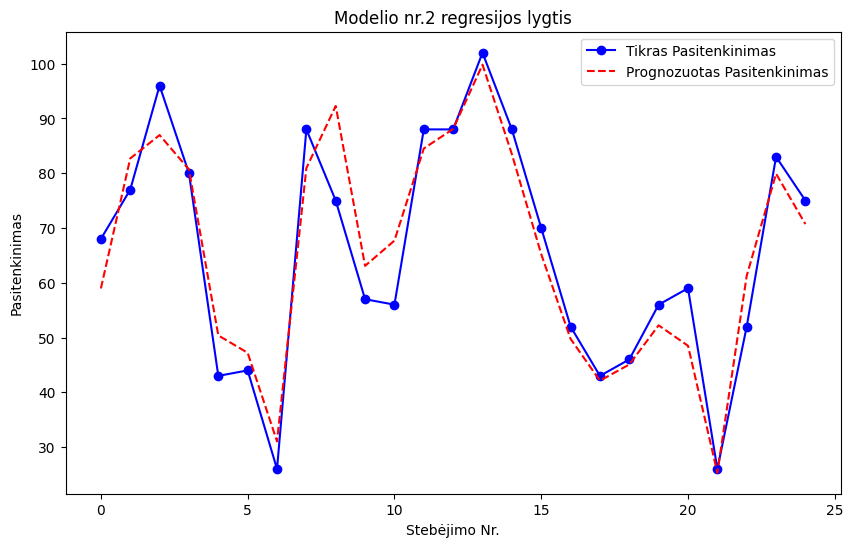

In [7]:
import matplotlib.pyplot as plt

new_df = pd.DataFrame()
new_df['Prognozuotas_Pasitenkinimas'] = results_2.predict(const)


plt.figure(figsize=(10, 6))
plt.plot(df['Pasitenkinimas'], label='Tikras Pasitenkinimas', color='blue', marker='o')
plt.plot(new_df['Prognozuotas_Pasitenkinimas'], label='Prognozuotas Pasitenkinimas', color='red', linestyle='--')

plt.xlabel('Stebėjimo Nr.')
plt.ylabel('Pasitenkinimas')

plt.title('Modelio nr.2 regresijos lygtis')

plt.legend()

plt.show()

(f)	Siekiant vertinti modelio nr.2 tinkamumą duomenims patikrinkite šias prielaidas ir pateikite gautas išvadas:
- a.	Liekamųjų paklaidų normalumą grafiškai ir tikrinant hipotezę apie normalumą;
- b.	Liekamųjų paklaidų nepriklausomumą tikrinant atitinkamą hipotezę;
- c.	Liekamųjų paklaidų heteroskedastiškumą, pagal diagramą ir tikrinant hipotezę;
- d.	Patikrinkite ar duomenyse nėra išskirčių pagal Kuko mato diagramą.


- a. Liekamųjų paklaidų normalumą

Kolmogorovo-Smirnovo testo statistika: 0.14
Kolmogorovo-Smirnovo testo p-vertė: 0.66


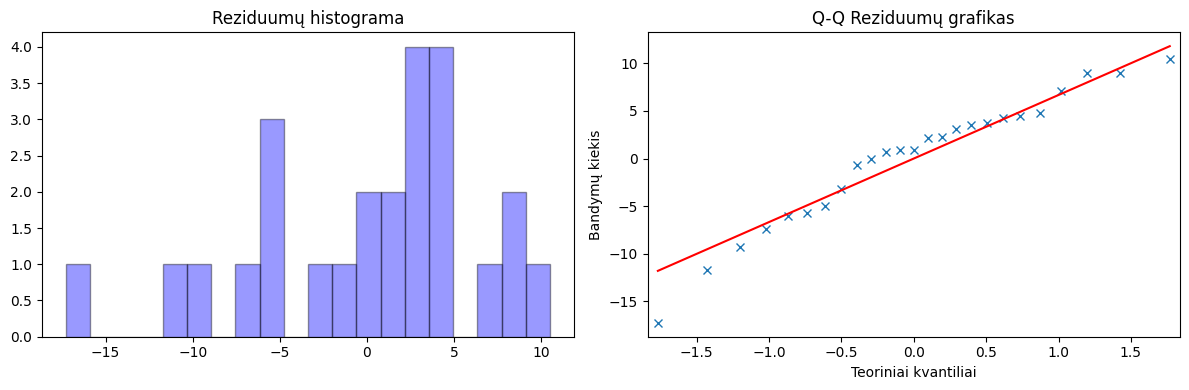

In [8]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest

residuals = results_2.resid
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

ks_statistic, ks_p_value = kstest(standardized_residuals, 'norm')

print(f'Kolmogorovo-Smirnovo testo statistika: {round(ks_statistic, 2)}')
print(f'Kolmogorovo-Smirnovo testo p-vertė: {round(ks_p_value, 2)}')

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(residuals, bins=20, edgecolor='black', color='blue', alpha=0.4)
axs[0].set_title('Reziduumų histograma')

qqplot(residuals, line='s', ax=axs[1], marker='x')

axs[1].set_title('Q-Q Reziduumų grafikas')
axs[1].set_xlabel('Teoriniai kvantiliai')
axs[1].set_ylabel('Bandymų kiekis')

plt.tight_layout()
plt.show()

- b. Liekamųjų paklaidų nepriklausomumas

In [9]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson = durbin_watson(results_2.resid)

print(f'Durbin-Watson statistika: {round(durbin_watson, 2)}')

Durbin-Watson statistika: 1.93


Durbin-Watson testo statistika modelio liekamųjų paklaidų nepriklausomumui yra 1.93, kuri yra arti optimalios 2 reikšmės. Ši reikšmė rodo, kad autokoreliacijos liekamosiose paklaidose nėr

- c. Liekamųjų paklaidų heteroskedastiškumas

Homoskedastiškumo prielaida įvykdyta (neatmesti H0)


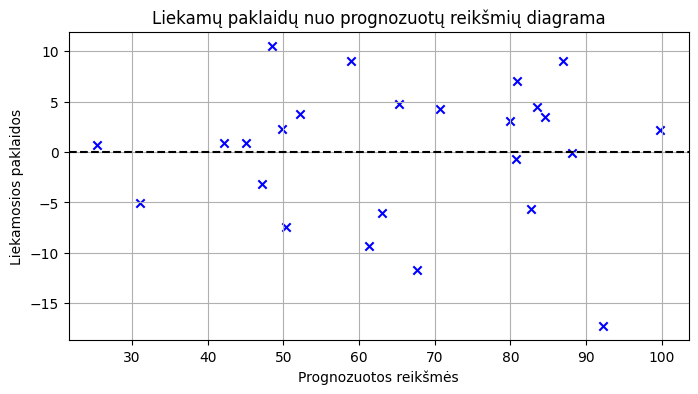

In [10]:
fitted_values = results_2.fittedvalues

plt.figure(figsize=(8, 4))

plt.scatter(results_2.fittedvalues, results_2.resid, marker='x', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(True)
plt.title('Liekamų paklaidų nuo prognozuotų reikšmių diagrama')
plt.xlabel('Prognozuotos reikšmės')
plt.ylabel('Liekamosios paklaidos')

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'residuals' and 'X' are defined somewhere in your code
# Perform Breusch-Pagan test
test_result = het_breuschpagan(results_2.resid, const)

# Extract test statistic and p-value
test_statistic = test_result[0]
p_value = test_result[1]

alpha = 0.05
if p_value > alpha:
    print('Homoskedastiškumo prielaida įvykdyta (neatmesti H0)')
else:
    print('Homoscedastiškumo prielaida pažeista (atmesti H0)')
    print('p-value:', p_value)


Pagal liekamųjų paklaidų grafiką ir Breusch-Pagan testo rezultatus:

Liekamųjų paklaidų grafikas: Liekamųjų paklaidų išsidėstymas neatrodo kaip sistemiškai didėjantis ar mažėjantis, kas rodytų heteroskedastiškumą. Vis dėlto yra keletas išskirtinių taškų su didesnėmis liekamosiomis paklaidomis, bet šie taškai nepasirodo pakankami, kad patvirtintų heteroskedastiškumo problemą. Liekamosios paklaidos išsidėsčiusios aplink horizontalią liniją gana atsitiktinai, tad vizualiai heteroskedastiškumo nesimato.

Breusch-Pagan testas: Testo rezultatai neparodo reikšmingo heteroskedastiškumo, nes LM testo p-reikšmė yra 0.5062, o F testo p-reikšmė yra 0.5408. Abu šie rodikliai viršija 0.05 reikšmingumo lygį, kas reiškia, kad nėra pakankamai įrodymų atmesti nulinę hipotezę apie homoskedastiškumą. Taigi, pagal Breusch-Pagan testą, heteroskedastiškumo nėra.

- d.	Patikrinkite ar duomenyse nėra išskirčių pagal Kuko mato diagramą.

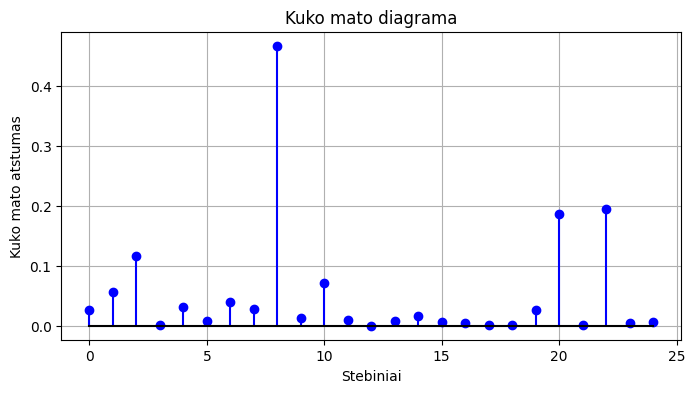

In [11]:
influence = results_2.get_influence()
cooks_distance = influence.cooks_distance[0]

plt.figure(figsize=(8, 4))
plt.stem(cooks_distance, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title("Kuko mato diagrama")
plt.xlabel("Stebiniai")
plt.ylabel("Kuko mato atstumas")
plt.grid(True)

plt.show()

Remiantis gauta Kuko atstumo diagrama, matome, kad yra keletas taškų su didesniu Kuko atstumu, tačiau nė vienas iš jų neviršija ribos, kuri paprastai nustatoma kaip 1. Todėl, remiantis šia diagrama, nėra pagrindo laikyti bet kurį stebėjimą išskirtimi. Tai rodo, kad nors kai kurie duomenų taškai turi didesnį įtakos modelio parametrams dydį, jie nelaikomi pakankamai ekstremaliais, kad iškraipytų modelio rezultatus.